In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### Load data: model predictions and true values

In [2]:
def calc_pc(dataset, cutoff):

    df = pd.DataFrame(columns=["wt_pdb","mut_pdb","pred_score","true_label"])
    for fold in range(10):
        df = pd.concat([df, pd.read_csv(f"model_predictions/{dataset}/Graphinity_predictions_test-Experimental_ddG_645-{dataset}-{cutoff}-fold{fold}.csv")])
    
    pc = pearsonr(df["true_label"],df["pred_score"])[0]

    return pc

In [3]:
pcs = []
for dataset in ["no_rev_muts_no_non_binders","no_rev_muts_w_non_binders",
                "w_rev_muts_no_non_binders","w_rev_muts_w_non_binders"]:
    for cutoff in ["random","cutoff_100","cutoff_90","cutoff_70"]:
        if cutoff == "random": c = "None"
        else: c = cutoff.replace("cutoff_","")
        pcs.append([dataset, c, calc_pc(dataset=dataset,cutoff=cutoff)])

In [4]:
pcs_df = pd.DataFrame(pcs, columns=["Dataset","Cutoff","Pearson's Correlation"])

### Plot

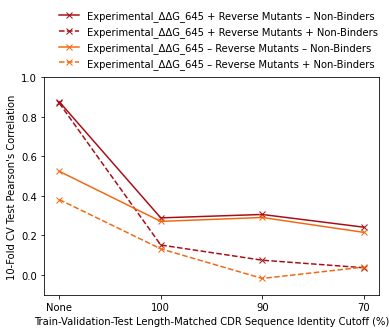

In [5]:
dataset_info = {
    "w_rev_muts_w_non_binders": ["Experimental_ΔΔG_645 + Reverse Mutants + Non-Binders", "#a50f15", "--"],
    "w_rev_muts_no_non_binders": ["Experimental_ΔΔG_645 + Reverse Mutants – Non-Binders", "#a50f15", "-"],
    "no_rev_muts_w_non_binders": ["Experimental_ΔΔG_645 – Reverse Mutants + Non-Binders", "#f16913", "--"],
    "no_rev_muts_no_non_binders": ["Experimental_ΔΔG_645 – Reverse Mutants – Non-Binders", "#f16913", "-"],
}

for dataset in ["w_rev_muts_no_non_binders","w_rev_muts_w_non_binders",
                "no_rev_muts_no_non_binders","no_rev_muts_w_non_binders"]:
    pcs_df_ds = pcs_df[pcs_df["Dataset"] == dataset]
    plt.plot(pcs_df_ds["Cutoff"],pcs_df_ds["Pearson's Correlation"], marker="x", color=dataset_info[dataset][1],
             linestyle=dataset_info[dataset][2], label=dataset_info[dataset][0])

plt.ylabel("10-Fold CV Test Pearson's Correlation")
plt.xlabel("Train-Validation-Test Length-Matched CDR Sequence Identity Cutoff (%)")
plt.legend(frameon=False, bbox_to_anchor=(1.025, 1.35))

plt.ylim(-0.1,1)

plt.savefig("Figure-2c-Experimental_ddG_645.png", dpi=300, bbox_inches="tight")